In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

Load the data in the python script

In [3]:
df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")

Select the features wanted from the bank data

In [4]:
features = ["age",
            "job",
            "marital",
            "education",
            "default",
            "housing",
            "loan",
            "contact",
            "month",
            "day_of_week",
            "duration",
            "campaign",
            "pdays",
            "previous",
            "poutcome",
            "emp.var.rate",
            "cons.price.idx",
            "cons.conf.idx",
            "euribor3m",
            "nr.employed",
            ]

# Show the features
df[features].head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [5]:
# Show the outcomes of the "y" column
outcomes = ["y"]
df[outcomes].head()

,y
0,no
1,no
2,no
3,no
4,no


Then we will create a dummies copy of the data and errase the features we don need


In [6]:
# Create the dummies
df_dummies = pd.get_dummies(df)
df_dummies = df_dummies.copy()

# Erase the features
del df_dummies["duration"]
del df_dummies["y_no"]



Lets select the data required to create a histogram

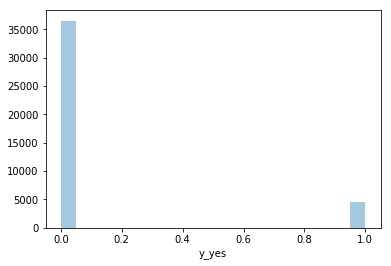

In [7]:
y__y_hist = sns.distplot(df_dummies['y_yes'], bins = 20, kde = False, rug = False)
plt.show()
#y_y_hist.savefig("histogram.png", bbox_inches = 'tight')

Classifier and Cross-validation

Import the libraries for the clasification

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [9]:
# Create the classifier
clf = ExtraTreesClassifier(n_estimators = 100,max_depth = 4)
dummy_clf = DummyClassifier()

# Clear the dummies
df_dummies = df_dummies.dropna()

# Select the nuew outcomes and fetaures
outcomes_of_interest = ["y_yes"]
features = ["age",
            "campaign",
            "pdays",
            "previous",
            "emp.var.rate",
            "cons.price.idx",
            "cons.conf.idx",
            "euribor3m",
            "nr.employed",
            "job_admin.",
            "month_sep",
            "day_of_week_fri",
            "day_of_week_mon",
            "day_of_week_thu",
            "day_of_week_tue",
            "day_of_week_wed",
            "poutcome_failure",
            "poutcome_nonexistent",
            "poutcome_success",
            ]

# Create future variables for the classiifer and crossvalidation section 
X_df = df_dummies[features].copy()
y_df = df_dummies[outcomes_of_interest].copy()

y_df = df_dummies[outcomes_of_interest].copy()

y_df[outcomes_of_interest] = y_df[outcomes_of_interest].apply(LabelEncoder().fit_transform)

X = X_df.values
y = y_df.values.T[0]

In [10]:
#Create a 10K fold cross validation
scores = cross_val_score(clf, X, y, cv=10,scoring = make_scorer(acc))
dummy_clf.fit(X,y)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [15]:
#Show the results
print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f")
print(acc(y,dummy_clf.predict(X)))


ACC: 0.84 (+/- 0.16)
Dummy ACC: %0.2f
0.7996261046906866


In [16]:
clf = ExtraTreesClassifier(n_estimators = 100, max_depth = 4)
clf.fit(X,y)

print (acc(y,clf.predict(X)))


0.8992667767310867


[ 2  8 18  7  4  6 16  5 17  3 10  0 12  1  9 13 14 15 11]
Feature ranking:
1. pdays (0.226639)
2. nr.employed (0.191660)
3. poutcome_success (0.167899)
4. euribor3m (0.145897)
5. emp.var.rate (0.094943)
6. cons.conf.idx (0.042577)
7. poutcome_failure (0.034616)
8. cons.price.idx (0.031656)
9. poutcome_nonexistent (0.027882)
10. previous (0.014175)
11. month_sep (0.009213)
12. age (0.005845)
13. day_of_week_mon (0.003315)
14. campaign (0.001436)
15. job_admin. (0.001005)
16. day_of_week_thu (0.000419)
17. day_of_week_tue (0.000287)
18. day_of_week_wed (0.000278)
19. day_of_week_fri (0.000258)


(0, 0.5397517508714376)

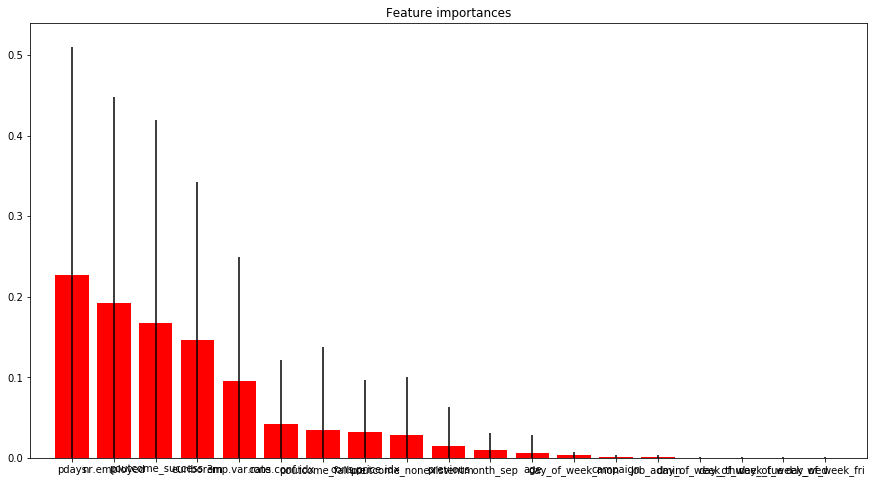

In [17]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

Confusion matrix

Normalized confusion matrix


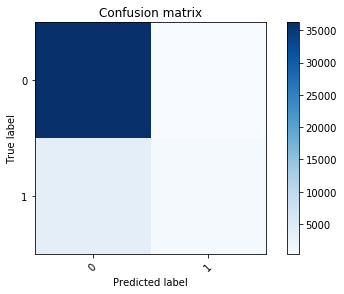

In [18]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize = True,
                      title='Confusion matrix')

plt.savefig("confusion_bank.png",bbox_inches='tight')
plt.savefig("confusion_bank.pdf",bbox_inches='tight')